# 서울시 범죄 현황 분석

In [1]:
import numpy as np
import pandas as pd

In [2]:
crime_anal_police = pd.read_csv(
      './data/02. crime_in_Seoul.csv'
    , thousands=','
    , encoding='euc-kr'
)
crime_anal_police.head(3)

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794


In [3]:
crime_anal_police.columns

Index(['관서명', '살인 발생', '살인 검거', '강도 발생', '강도 검거', '강간 발생', '강간 검거', '절도 발생',
       '절도 검거', '폭력 발생', '폭력 검거'],
      dtype='object')

In [4]:
import googlemaps

In [6]:
# 키 등록
gmaps = googlemaps.Client(key=gmaps_key)

# 지도 검색

In [7]:
# 지도에서 해당 위치검색
gmaps.geocode('서울중부경찰서', language='ko') 

# 하나의 리스트에 쌓여서 딕셔너리 형태로 반환됨
# formatted_address: 전체 주소 담겨있음
# geometry: 좌표 (lat: 위도(Latitude). lng: 경도(longitude))

[{'address_components': [{'long_name': '２７',
    'short_name': '２７',
    'types': ['premise']},
   {'long_name': '수표로',
    'short_name': '수표로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '중구',
    'short_name': '중구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '100-032',
    'short_name': '100-032',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 중구 수표로 27',
  'geometry': {'location': {'lat': 37.56361709999999, 'lng': 126.9896517},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.5649660802915,
     'lng': 126.9910006802915},
    'southwest': {'lat': 37.5622681197085, 'lng': 126.9883027197085}}},
  'partial_match': True,
  'place_id': 'ChIJc-9q5uSifDURLhQmr5wkXmc',
 

### 지도 정보에서 특정 정보만 추출
- tmp[0].get(key)

In [8]:
tmp = gmaps.geocode('서울중부경찰서', language='ko')
# type(tmp) # list, type(tmp[0]) # dict
print(tmp[0].get('formatted_address'))

#print(tmp[0].get('geometry').get('location').get('lat'))
#print(tmp[0].get('geometry').get('location').get('lng'))

print(tmp[0].get('geometry')['location']['lat'])
print(tmp[0].get('geometry')['location']['lng'])

대한민국 서울특별시 중구 수표로 27
37.56361709999999
126.9896517


### 기존 관서 명을 풀 네임으로 변경 작업
    ex. 중부서 > 서울 + 중부 + 경찰서

In [9]:
station_name = [] # 리스트에 담기
for name in crime_anal_police['관서명']:
    station_name.append('서울' + str(name[:-1]) + '경찰서') 
    # name[:-1] 맨 뒤에꺼만 빼고 가져옴, ndarray는 문자열이 오브젝트로 저장되니까 str으로 형변환 해줘야 함

station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

### values로 구글 지도에서 검색하기
1. 주소, 위도, 경도 담을 리스트 생성
2. for 돌려서 내용 하나씩 추출해서 리스트에 담기

In [10]:
station_address = [] # 주소 저장할 리스트 공간 생성
station_lat = [] # 위도 저장할 리스트 생성
station_lng = [] # 경도 저장할 리스트 생성

for name in station_name: # 30개 관서명 들어있음
    tmp = gmaps.geocode(name, language='ko') # list 반환
    station_address.append(tmp[0].get('formatted_address')) #주소 저장
    station_lat.append(tmp[0].get('geometry')['location']['lat']) #위도 저장
    station_lng.append(tmp[0].get('geometry')['location']['lng']) #경도 저장
    print(name + ': ' + tmp[0].get('formatted_address'))
    

서울중부경찰서: 대한민국 서울특별시 중구 수표로 27
서울종로경찰서: 대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46
서울남대문경찰서: 대한민국 서울특별시 중구 한강대로 410
서울서대문경찰서: 대한민국 서울특별시 서대문구 통일로 113
서울혜화경찰서: 대한민국 서울특별시 종로구 인의동 창경궁로 112-16
서울용산경찰서: 대한민국 서울특별시 용산구 백범로 329
서울성북경찰서: 대한민국 서울특별시 성북구 삼선동 보문로 170
서울동대문경찰서: 대한민국 서울특별시 동대문구 약령시로21길 29
서울마포경찰서: 대한민국 서울특별시 마포구 마포대로 183
서울영등포경찰서: 대한민국 서울특별시 영등포구 당산동3가 국회대로 608
서울성동경찰서: 대한민국 서울특별시 성동구 행당동 왕십리광장로 9
서울동작경찰서: 대한민국 서울특별시 동작구 노량진로 148
서울광진경찰서: 대한민국 서울특별시 광진구 구의동 자양로 167
서울서부경찰서: 대한민국 서울특별시 은평구 녹번동 177-15
서울강북경찰서: 대한민국 서울특별시 강북구 오패산로 406
서울금천경찰서: 대한민국 서울특별시 금천구 시흥대로73길 50
서울중랑경찰서: 대한민국 서울특별시 중랑구 묵2동 249-2
서울강남경찰서: 대한민국 서울특별시 강남구 테헤란로114길 11
서울관악경찰서: 대한민국 서울특별시 관악구 관악로5길 33
서울강서경찰서: 대한민국 서울특별시 강서구 화곡6동 980-27
서울강동경찰서: 대한민국 서울특별시 강동구 성내로 57
서울종암경찰서: 대한민국 서울특별시 성북구 종암로 135
서울구로경찰서: 대한민국 서울특별시 구로구 가마산로 235
서울서초경찰서: 대한민국 서울특별시 서초구 서초3동 반포대로 179
서울양천경찰서: 대한민국 서울특별시 양천구 목동동로 99
서울송파경찰서: 대한민국 서울특별시 송파구 중대로 221
서울노원경찰서: 대한민국 서울특별시 노원구 하계동 노원로 283
서울방배경찰서: 대한민국 서울특별시 서초구 동작대로 204
서울은평경찰서: 대한민국 서울특별시 은평구 불광

In [11]:
# 영등포경찰서가 조회되지 않음
# 서울특별시 영등포구 당산동3가 국회대로 608
# 위도: 37.5276392045725, 경도: 126.9011667350785

In [12]:
station_address = [] # 주소 저장할 리스트 공간 생성
station_lat = [] # 위도 저장할 리스트 생성
station_lng = [] # 경도 저장할 리스트 생성

for name in station_name: # 30개 관서명 들어있음
    if name =='서울영등포경찰서':
        station_address.append('서울특별시 영등포구 당산동3가 국회대로 608') #주소 저장
        station_lat.append('37.5276392045725') #위도 저장
        station_lng.append('126.9011667350785') #경도 저장
        print(name + ': ' + '서울특별시 영등포구 당산동3가 국회대로 608')
    else:
        tmp = gmaps.geocode(name, language='ko') # list 반환
        station_address.append(tmp[0].get('formatted_address')) #주소 저장
        station_lat.append(tmp[0].get('geometry')['location']['lat']) #위도 저장
        station_lng.append(tmp[0].get('geometry')['location']['lng']) #경도 저장
        print(name + ': ' + tmp[0].get('formatted_address'))


서울중부경찰서: 대한민국 서울특별시 중구 수표로 27
서울종로경찰서: 대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46
서울남대문경찰서: 대한민국 서울특별시 중구 한강대로 410
서울서대문경찰서: 대한민국 서울특별시 서대문구 통일로 113
서울혜화경찰서: 대한민국 서울특별시 종로구 인의동 창경궁로 112-16
서울용산경찰서: 대한민국 서울특별시 용산구 백범로 329
서울성북경찰서: 대한민국 서울특별시 성북구 삼선동 보문로 170
서울동대문경찰서: 대한민국 서울특별시 동대문구 약령시로21길 29
서울마포경찰서: 대한민국 서울특별시 마포구 마포대로 183
서울영등포경찰서: 서울특별시 영등포구 당산동3가 국회대로 608
서울성동경찰서: 대한민국 서울특별시 성동구 행당동 왕십리광장로 9
서울동작경찰서: 대한민국 서울특별시 동작구 노량진로 148
서울광진경찰서: 대한민국 서울특별시 광진구 구의동 자양로 167
서울서부경찰서: 대한민국 서울특별시 은평구 녹번동 177-15
서울강북경찰서: 대한민국 서울특별시 강북구 오패산로 406
서울금천경찰서: 대한민국 서울특별시 금천구 시흥대로73길 50
서울중랑경찰서: 대한민국 서울특별시 중랑구 묵2동 249-2
서울강남경찰서: 대한민국 서울특별시 강남구 테헤란로114길 11
서울관악경찰서: 대한민국 서울특별시 관악구 관악로5길 33
서울강서경찰서: 대한민국 서울특별시 강서구 화곡6동 980-27
서울강동경찰서: 대한민국 서울특별시 강동구 성내로 57
서울종암경찰서: 대한민국 서울특별시 성북구 종암로 135
서울구로경찰서: 대한민국 서울특별시 구로구 가마산로 235
서울서초경찰서: 대한민국 서울특별시 서초구 서초3동 반포대로 179
서울양천경찰서: 대한민국 서울특별시 양천구 목동동로 99
서울송파경찰서: 대한민국 서울특별시 송파구 중대로 221
서울노원경찰서: 대한민국 서울특별시 노원구 하계동 노원로 283
서울방배경찰서: 대한민국 서울특별시 서초구 동작대로 204
서울은평경찰서: 대한민국 서울특별시 은평구 불광동 연서로

In [13]:
# 리스트에 담긴 값 확인
station_address

['대한민국 서울특별시 중구 수표로 27',
 '대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46',
 '대한민국 서울특별시 중구 한강대로 410',
 '대한민국 서울특별시 서대문구 통일로 113',
 '대한민국 서울특별시 종로구 인의동 창경궁로 112-16',
 '대한민국 서울특별시 용산구 백범로 329',
 '대한민국 서울특별시 성북구 삼선동 보문로 170',
 '대한민국 서울특별시 동대문구 약령시로21길 29',
 '대한민국 서울특별시 마포구 마포대로 183',
 '서울특별시 영등포구 당산동3가 국회대로 608',
 '대한민국 서울특별시 성동구 행당동 왕십리광장로 9',
 '대한민국 서울특별시 동작구 노량진로 148',
 '대한민국 서울특별시 광진구 구의동 자양로 167',
 '대한민국 서울특별시 은평구 녹번동 177-15',
 '대한민국 서울특별시 강북구 오패산로 406',
 '대한민국 서울특별시 금천구 시흥대로73길 50',
 '대한민국 서울특별시 중랑구 묵2동 249-2',
 '대한민국 서울특별시 강남구 테헤란로114길 11',
 '대한민국 서울특별시 관악구 관악로5길 33',
 '대한민국 서울특별시 강서구 화곡6동 980-27',
 '대한민국 서울특별시 강동구 성내로 57',
 '대한민국 서울특별시 성북구 종암로 135',
 '대한민국 서울특별시 구로구 가마산로 235',
 '대한민국 서울특별시 서초구 서초3동 반포대로 179',
 '대한민국 서울특별시 양천구 목동동로 99',
 '대한민국 서울특별시 송파구 중대로 221',
 '대한민국 서울특별시 노원구 하계동 노원로 283',
 '대한민국 서울특별시 서초구 동작대로 204',
 '대한민국 서울특별시 은평구 불광동 연서로 365',
 '대한민국 서울특별시 도봉구 노해로 403',
 '대한민국 서울특별시 강남구 개포로 617']

In [14]:
station_lat

[37.56361709999999,
 37.575548,
 37.5547584,
 37.5647439,
 37.5719679,
 37.5387099,
 37.58977830000001,
 37.58506149999999,
 37.550814,
 '37.5276392045725',
 37.5617303,
 37.5130866,
 37.542873,
 37.6021405,
 37.63730390000001,
 37.4568722,
 37.6056429,
 37.5094352,
 37.4743945,
 37.551284,
 37.528511,
 37.6020592,
 37.494931,
 37.4956054,
 37.5167711,
 37.5016941,
 37.6425238,
 37.4945959,
 37.6283178,
 37.6533589,
 37.49349]

In [15]:
station_lng

[126.9896517,
 126.9847471,
 126.9734981,
 126.9667705,
 126.9989574,
 126.9659183,
 127.016589,
 127.0457679,
 126.954028,
 '126.9011667350785',
 127.0364217,
 126.9428498,
 127.083821,
 126.9213074,
 127.0273399,
 126.8970429,
 127.0764866,
 127.0669578,
 126.9513489,
 126.850038,
 127.1268224,
 127.0321577,
 126.886731,
 127.0052504,
 126.8656996,
 127.1272481,
 127.0717076,
 126.9831279,
 126.9287041,
 127.052682,
 127.0772119]

### 구 단위만 추출
1. split()으로 문자열 쪼개기
2. for 돌려서 구로 끝나는 글자 찾기

In [16]:
station_address[0] #값이 정상적으로 들어갔는지 한 로만 확인

'대한민국 서울특별시 중구 수표로 27'

In [17]:
station_address[0].split() #리스트로 반환됨

['대한민국', '서울특별시', '중구', '수표로', '27']

In [18]:
station_address[0].split()[0]

'대한민국'

In [19]:
station_address[0].split()[0][-1]

'국'

In [20]:
station_address[0].split()[2][-1] == '구'

True

In [21]:
tmp = station_address[0].split()
tmp

['대한민국', '서울특별시', '중구', '수표로', '27']

In [22]:
tmp_gu = [gu for gu in tmp if gu[-1] == '구']
tmp_gu

['중구']

In [23]:
tmp_gu = [gu for gu in tmp if gu[-1] == '구'][0] #[0]을 붙이면 문자열이 됨
tmp_gu

'중구'

In [24]:
gu_name = []

for name in station_address:
    tmp = name.split() # 문자열 쪼개기
    tmp_gu = [gu for gu in tmp if gu[-1]=='구'][0] #구 찾기
    gu_name.append(tmp_gu) #찾은 구 넣기
    
gu_name

['중구',
 '종로구',
 '중구',
 '서대문구',
 '종로구',
 '용산구',
 '성북구',
 '동대문구',
 '마포구',
 '영등포구',
 '성동구',
 '동작구',
 '광진구',
 '은평구',
 '강북구',
 '금천구',
 '중랑구',
 '강남구',
 '관악구',
 '강서구',
 '강동구',
 '성북구',
 '구로구',
 '서초구',
 '양천구',
 '송파구',
 '노원구',
 '서초구',
 '은평구',
 '도봉구',
 '강남구']

### 찾은 구 이름을 DF에 새 컬럼으로 추가하기

In [25]:
crime_anal_police.head() #기존 데이터프레임 조회

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


In [26]:
crime_anal_police['구별'] = gu_name #구별 컬럼 추가하고 밸류로 구 이름 넣기
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [27]:
crime_anal_police[crime_anal_police['관서명']=='금천서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,금천구


# 범죄 현황 정리

In [49]:
#구 별로 그룹핑하기
crime_anal = pd.pivot_table(
     crime_anal_raw
    ,index='구별'
    ,aggfunc=np.sum
)
crime_anal.loc['중구'] #특정 로값만 추출

강간 검거     111
강간 발생     170
강도 검거       6
강도 발생       9
살인 검거       2
살인 발생       3
절도 검거     859
절도 발생    2548
폭력 검거    1964
폭력 발생    2224
Name: 중구, dtype: int64

In [50]:
#  검거율 구하기
crime_anal['강간검거율'] = crime_anal['강간 검거'] / crime_anal['강간 발생'] * 100
crime_anal['강도검거율'] = crime_anal['강도 검거'] / crime_anal['강도 발생'] * 100
crime_anal['살인검거율'] = crime_anal['살인 검거'] / crime_anal['살인 발생'] * 100
crime_anal['절도검거율'] = crime_anal['절도 검거'] / crime_anal['절도 발생'] * 100
crime_anal['폭력검거율'] = crime_anal['폭력 검거'] / crime_anal['폭력 발생'] * 100

In [51]:
del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']
del crime_anal['살인 검거']

In [52]:
crime_anal.head() #100%가 넘는 비율은 발생한 년도와 검거 년도가 다른 것임

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157


In [53]:
crime_anal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   강간 발생   25 non-null     int64  
 1   강도 발생   25 non-null     int64  
 2   살인 발생   25 non-null     int64  
 3   절도 발생   25 non-null     int64  
 4   폭력 발생   25 non-null     int64  
 5   강간검거율   25 non-null     float64
 6   강도검거율   25 non-null     float64
 7   살인검거율   25 non-null     float64
 8   절도검거율   25 non-null     float64
 9   폭력검거율   25 non-null     float64
dtypes: float64(5), int64(5)
memory usage: 2.7+ KB


In [55]:
con_list = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
con_list

['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

### 조건 찾아서 원하는 값으로 바꿈

In [56]:
#큰 데이터 돌리기 전에 미리 테스트 해봄 1
crime_anal.loc[crime_anal['강도검거율'] > 100] #특정 로 선택

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,185.714286,100.000000,42.200925,83.047619
도봉구,102,9,3,1063,1487,103.921569,111.111111,100.000000,44.967074,87.626093


In [57]:
#큰 데이터 돌리기 전에 미리 테스트 해봄 2
crime_anal.loc[crime_anal['강도검거율'] > 100, '강도검거율'] #감도검거율이 100보다 큰 로 찾아서 강도검거율 컬럼만 조회

구별
강동구    133.333333
관악구    116.666667
광진구    185.714286
도봉구    111.111111
Name: 강도검거율, dtype: float64

In [58]:
for col in con_list:
    crime_anal.loc[crime_anal[col] > 100, col] = 100
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


In [59]:
#컬럼명 바꾸기
crime_anal.rename(columns={
     '강간 발생' : '강간'
    ,'강도 발생' : '강도'
    ,'살인 발생' : '살인'
    ,'폭력 발생' : '폭력'
    ,'절도 발생' : '절도'
}
,inplace=True
)
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


# 데이터 정규화(preprocessing)
- 정규화를 해야 데이터 비교가 가능하고, 시각화 시 일정범위가 생성됨

### 1. MinMaxScaler Class
- 기존 데이터 값을 0~1 사이의 값으로 변환
- (x - min) / (max - min) 

### 2. standard(=정규=일반적) scaler
- 특정값들을 정규분포를 따르는 값으로 변환 
- 평균=0, 표준편차=1
- 평균문제 발생 > 데이터량이 많을 경우 > 신뢰성 발생
- 이상치=outlier 들이 발생하면 삭제하고 중간 값으로 대체함

### 3. RobustScaler
- 이상치가 많을 땐 로버스트 스케일러를 사용함
- 사분위에서 25%(1분위) ~ 75%(3분위)의 값(IQR)으로 변환
- min~25%: Min=x-IQR*1.5 범위 아래에 있는 값들이 이상치가 됨 
- 25%~75%: IQR
- 75%~max: Max=y+(IQR*1.5) 범위를 넘는 값들이 이상치가 됨

In [60]:
from sklearn import preprocessing

In [61]:
col = ['강간','강도','살인','절도','폭력'] #for 돌릴 컬럼 변수에 담기
x = crime_anal[col].values #팬시인덱싱 후, values으로 ndarray 추출
#x.shape #(25행, 5열)
x

array([[ 449,   21,   13, 3850, 4284],
       [ 156,    6,    4, 2366, 2712],
       [ 153,   14,    7, 1434, 2649],
       [ 262,   13,    7, 2096, 3207],
       [ 320,   12,    9, 2706, 3298],
       [ 240,   14,    4, 3026, 2625],
       [ 281,   15,    8, 2335, 3007],
       [ 151,    6,    3, 1567, 2054],
       [ 197,    7,   10, 2193, 2723],
       [ 102,    9,    3, 1063, 1487],
       [ 173,   13,    5, 1981, 2548],
       [ 285,    9,    5, 1865, 1910],
       [ 294,   14,    8, 2555, 2983],
       [ 154,    5,    2, 1812, 2056],
       [ 393,    9,    8, 2635, 2399],
       [ 126,    9,    4, 1607, 1612],
       [ 150,    5,    5, 1785, 2209],
       [ 220,   13,   11, 3239, 3295],
       [ 120,    6,    3, 1890, 2509],
       [ 295,   22,   14, 2964, 3572],
       [ 194,   14,    5, 1557, 2050],
       [ 166,    9,    3, 1914, 2653],
       [ 211,   11,    6, 2184, 2293],
       [ 170,    9,    3, 2548, 2224],
       [ 187,   11,   13, 2135, 2847]], dtype=int64)

### MinMaxScaler 사용

In [63]:
#1. MinMaxScaler 오브젝트 생성
min_max_scaler = preprocessing.MinMaxScaler()

#2. fit_transform() : 2와 3 한 번에 진행 (주로 얘를 씀)
x_scaled = min_max_scaler.fit_transform(x.astype(float))

In [64]:
x_scaled

array([[1.        , 0.94117647, 0.91666667, 1.        , 1.        ],
       [0.1556196 , 0.05882353, 0.16666667, 0.46752781, 0.43796925],
       [0.14697406, 0.52941176, 0.41666667, 0.13311805, 0.41544512],
       [0.4610951 , 0.47058824, 0.41666667, 0.37064944, 0.61494458],
       [0.62824207, 0.41176471, 0.58333333, 0.58952278, 0.64747944],
       [0.39769452, 0.52941176, 0.16666667, 0.70434159, 0.4068645 ],
       [0.51585014, 0.58823529, 0.5       , 0.45640474, 0.5434394 ],
       [0.14121037, 0.05882353, 0.08333333, 0.18083961, 0.2027172 ],
       [0.27377522, 0.11764706, 0.66666667, 0.40545389, 0.44190204],
       [0.        , 0.23529412, 0.08333333, 0.        , 0.        ],
       [0.20461095, 0.47058824, 0.25      , 0.32938644, 0.379335  ],
       [0.52737752, 0.23529412, 0.25      , 0.28776462, 0.15123346],
       [0.55331412, 0.52941176, 0.5       , 0.53534266, 0.53485878],
       [0.14985591, 0.        , 0.        , 0.26874776, 0.20343225],
       [0.83861671, 0.23529412, 0.

In [65]:
# x_scale > DF 로 바꾸기
crime_anal_norm = pd.DataFrame(
     x_scaled
    ,columns=col
    ,index=crime_anal.index #기존 데이터프레임의 인덱스를 그대로 사용
)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000
강동구,0.155620,0.058824,0.166667,0.467528,0.437969
강북구,0.146974,0.529412,0.416667,0.133118,0.415445
강서구,0.461095,0.470588,0.416667,0.370649,0.614945
관악구,0.628242,0.411765,0.583333,0.589523,0.647479


In [66]:
# 검거율 표준화
col2 = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

# 검거율을 crime_anal_norm 에 추가
crime_anal_norm[col2] = crime_anal[col2] #팬시색인으로 데프에 값 넣음
crime_anal_norm.head() #오브젝트에 들어가 있는 것임 -> 중간 저장 필요 (피클이나, csv로 저장하기)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157


### CCTV, 인구현황, 범죄현황 merge(=join)

In [67]:
#핵심 데이터: 인구현황(인구수), CCTV(소계) -> 핵심 데이터를 crime_anal_norm 에 추가
#1. CCTV, 인구현황 읽어오기
result_CCTV = pd.read_csv(
     './data/01. CCTV_result.csv'
    ,index_col='구별' #특정 컬럼을 인덱스로 보내는 파라미터
    ,encoding='utf-8'
)
result_CCTV.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673,162.948104


In [68]:
#인구수, 소계 컬럼과 값 추가하기
crime_anal_norm[['인구수','소계']] = result_CCTV[['인구수','소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,소계
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496


In [69]:
#데이터 확인 (axis 방향 맞는지 확인)
np.sum(crime_anal_norm[col], axis=1) #시리즈로 반환됨

구별
강남구     4.857843
강동구     1.286607
강북구     1.641616
강서구     2.333944
관악구     2.860342
광진구     2.204979
구로구     2.603930
금천구     0.666924
노원구     1.905445
도봉구     0.318627
동대문구    1.633921
동작구     1.451670
마포구     2.652927
서대문구    0.622036
서초구     2.464022
성동구     0.711008
성북구     0.905522
송파구     2.987821
양천구     0.856156
영등포구    3.983733
용산구     1.423080
은평구     1.225287
종로구     1.690786
중구      1.310920
중랑구     2.385443
dtype: float64

In [70]:
#구별 범죄발생 합계 컬럼 추가
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1) #인덱스가 키로 사용되서 동일 키 값에 해당하는 값으로 들어감
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,소계,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342


In [71]:
#검거 합계
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col2], axis=1)

In [72]:
crime_anal_norm.columns

Index(['강간', '강도', '살인', '절도', '폭력', '강간검거율', '강도검거율', '살인검거율', '절도검거율',
       '폭력검거율', '인구수', '소계', '범죄', '검거'],
      dtype='object')

# Seaborn
- matplotlib(모터), seaborn(엑셀) 의 개념

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#plt로 데이터 4개 생성 후, seaborn으로 만들기

In [74]:
#1. 0~14까지 100개의 구간을 ndarray로 생성
#sin0은 0이니까 시작값이 0이어야 함
x = np.linspace(0,14,100) 

In [75]:
len(x)

100

In [76]:
#2. sin 함수 생성
y1 = np.sin(x)

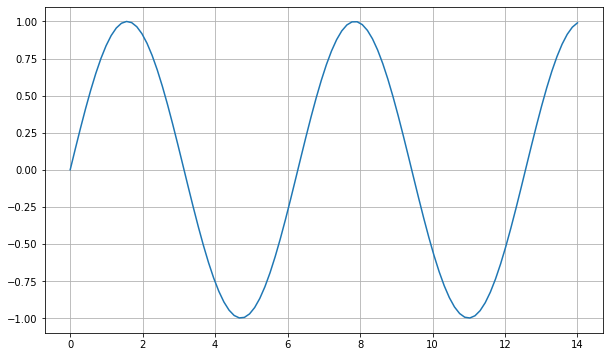

In [77]:
#3. 도화지 생성
plt.figure(figsize=(10,6)) #(폭, 높이)
plt.plot(x,y1)
plt.grid()
plt.show()

In [78]:
#sin 함수 생성
y1 = np.sin(x)
y2 = 2 * np.sin(x+0.5)
y3 = 3 * np.sin(x+1.0)
y4 = 4 * np.sin(x+1.5)

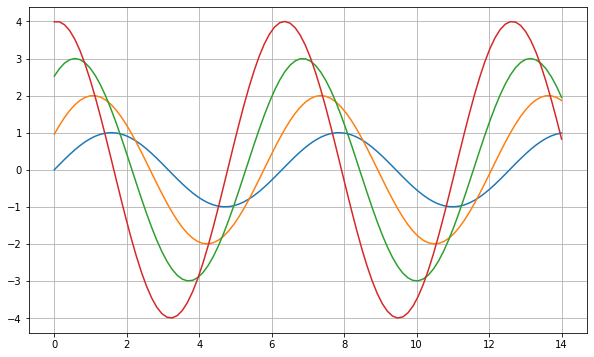

In [79]:
#도화지 생성 -> 여러 함수 그릴 땐, 각각 적어줌 (한 번에 적어도 되긴 됨)
plt.figure(figsize=(10,6)) #(폭, 높이)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.grid()
plt.show()

In [80]:
#seaborn 기본 테마: white(디폴트), dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

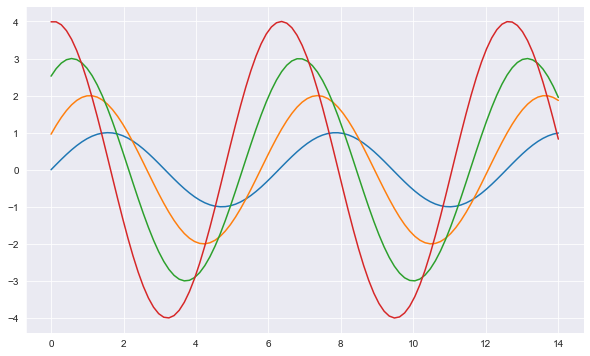

In [81]:
#도화지 생성
plt.figure(figsize=(10,6)) #(폭, 높이)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
sns.despine() #테두리 제거
plt.show()

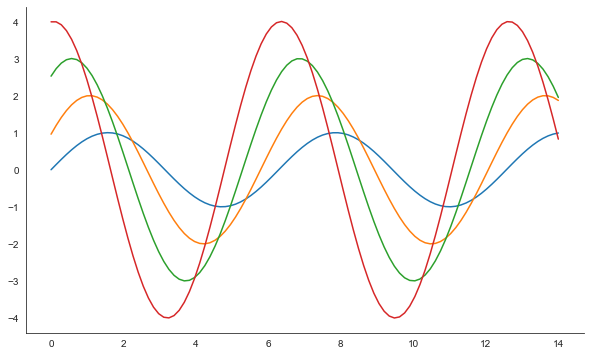

In [82]:
sns.set_style('white')
plt.figure(figsize=(10,6)) #(폭, 높이)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
sns.despine() #top과 right 테두리 제거
plt.show()

# 범죄 현황 분석

In [129]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,소계,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342,368.622261


In [130]:
#한글처리
from matplotlib import font_manager, rc
path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

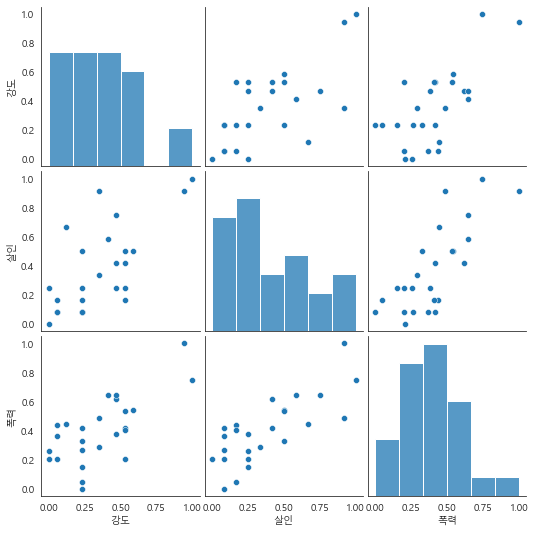

In [133]:
#'강도','살인','폭력' 간의 상관관계 시각화
sns.pairplot(
     crime_anal_norm
    ,vars=['강도','살인','폭력']
)
plt.show()

C:\Users\PC\anaconda3\envs\data-col\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\PC\anaconda3\envs\data-col\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


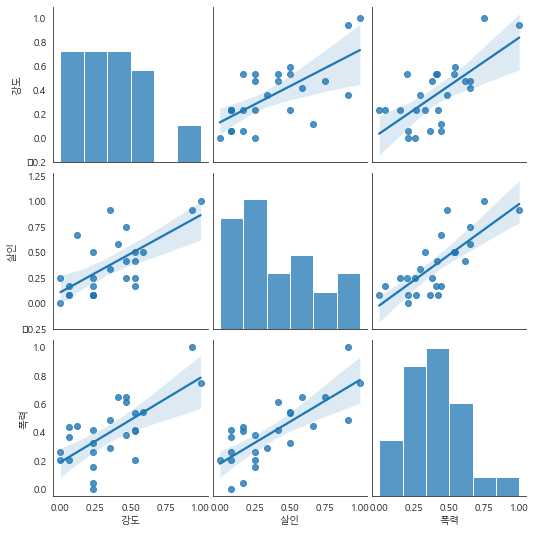

In [134]:
#'강도','살인','폭력' 간의 상관관계 시각화
sns.pairplot(
     crime_anal_norm
    ,vars=['강도','살인','폭력']
    ,kind='reg' #관계를 선으로 표시해줌
)
plt.show()

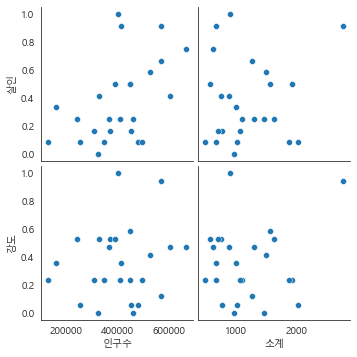

In [136]:
#인구수, CCTV와 살인,강도와의 관계 파악
sns.pairplot(
     crime_anal_norm
    ,x_vars=['인구수','소계']
    ,y_vars=['살인','강도']
)
plt.show()

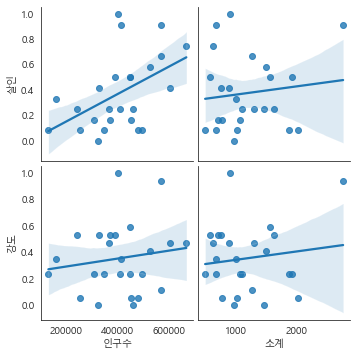

In [137]:
#인구수, CCTV와 살인,강도와의 관계 파악
sns.pairplot(
     crime_anal_norm
    ,x_vars=['인구수','소계']
    ,y_vars=['살인','강도']
    ,kind='reg' #상관관계를 선으로 보여줌
)
plt.show()

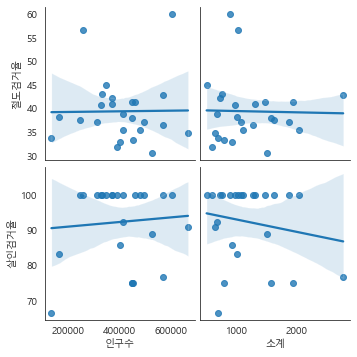

In [139]:
#인구수, CCTV와 살인,강도와의 관계 파악
sns.pairplot(
     crime_anal_norm
    ,x_vars=['인구수','소계']
    ,y_vars=['절도검거율','살인검거율']
    ,kind='reg'
)
plt.show()

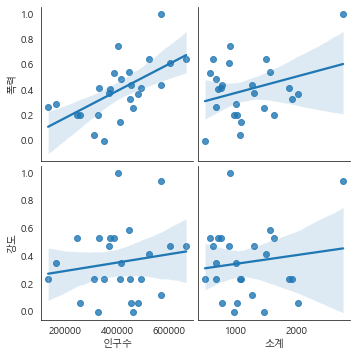

In [141]:
#인구수, CCTV와 살인,강도와의 관계 파악
sns.pairplot(
     crime_anal_norm
    ,x_vars=['인구수','소계']
    ,y_vars=['폭력','강도']
    ,kind='reg'
)
plt.show()

In [142]:
#데이터 파악
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,소계,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342,368.622261


In [143]:
#MinMaxScaler 이용해서 검거율이 가장 높은 구 확인
tmp_max = crime_anal_norm['검거'].max()
tmp_max #432가 최대값임

432.593167122272

In [145]:
#구별 검거율 조회
crime_anal_norm['검거']/tmp_max*100

구별
강남구      85.463066
강동구      85.550226
강북구      94.070728
강서구      96.572809
관악구      85.212224
광진구      96.375820
구로구      75.277906
금천구      97.997139
노원구      88.646174
도봉구     100.000000
동대문구     95.444250
동작구      74.633368
마포구      85.925381
서대문구     88.875144
서초구      77.181692
성동구      94.088810
성북구      89.727243
송파구      85.103066
양천구      81.823827
영등포구     81.958753
용산구      94.776790
은평구      86.842386
종로구      84.141835
중구       74.122650
중랑구      87.066663
Name: 검거, dtype: float64

In [146]:
#구별 검거율 표에 적용
crime_anal_norm['검거'] = crime_anal_norm['검거']/tmp_max*100
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,소계,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,0.318627,100.000000
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,255082.0,1015,0.666924,97.997139
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,603772.0,884,2.333944,96.572809
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,2.204979,96.375820
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,1.633921,95.444250


<AxesSubplot:ylabel='구별'>

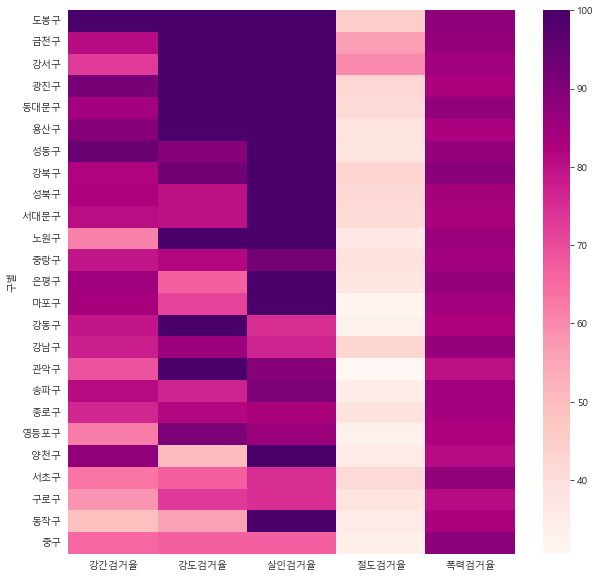

In [147]:
#히트맵으로 상관관계 표시
target_col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

plt.figure(figsize=(10,10))
sns.heatmap(
    crime_anal_norm_sort[target_col]
    ,cmap='RdPu' #색상 주기
)

<AxesSubplot:ylabel='구별'>

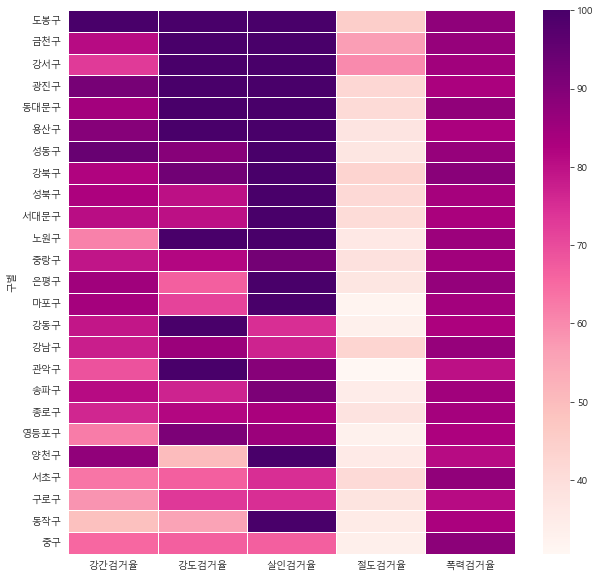

In [148]:
#히트맵으로 상관관계 표시
target_col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

plt.figure(figsize=(10,10))
sns.heatmap(
    crime_anal_norm_sort[target_col]
    ,cmap='RdPu'
    ,linewidths=0.5 #줄 간격
)

<AxesSubplot:ylabel='구별'>

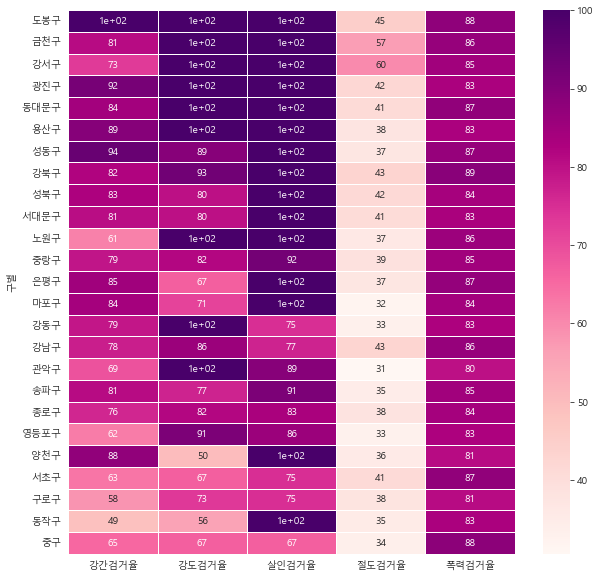

In [149]:
#히트맵으로 상관관계 표시
target_col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

plt.figure(figsize=(10,10))
sns.heatmap(
    crime_anal_norm_sort[target_col]
    ,cmap='RdPu'
    ,linewidths=0.5
    ,annot=True # 값 표시
)

In [155]:
#히트맵으로 범죄 발생 조회
target_col = ['강간','강도','살인','절도','폭력','범죄']
crime_anal_norm['범죄'] = crime_anal_norm['범죄']/5 #튀는 구간 없애기 위해 다른 데이터 단위와 맞추는 작업(범죄는 나머지 5개의 토탈임)
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)

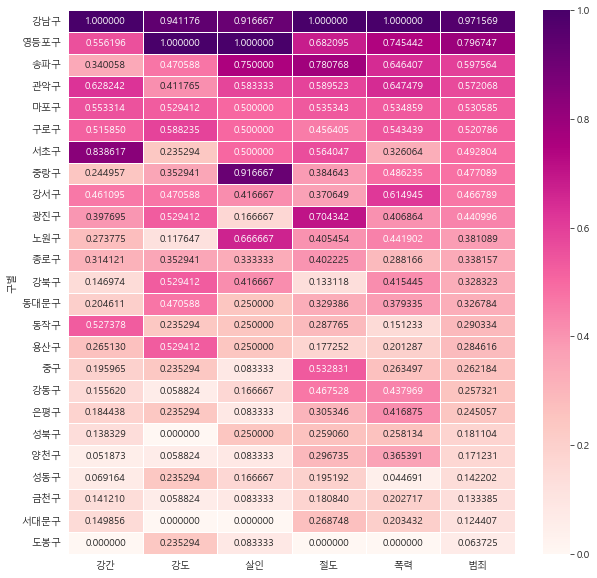

In [156]:
plt.figure(figsize=(10,10))
sns.heatmap(
     crime_anal_norm_sort[target_col]
    ,annot=True
    ,fmt='f'
    ,linewidths=0.5
    ,cmap='RdPu'
)
plt.show()

### 서울 지도에 구별 살인 발생 건수 시각화

In [157]:
import folium

In [ ]:
import json #웹 표준 데이터 전송 방식

In [182]:
#서울 지도 가져오기
geo_path = './data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [183]:
#서울 지도 확인
map = folium.Map(
     location=[37.5502, 126.982]
    ,zoom_start=11
)
map

In [185]:
#서울 살인 건수 비교
map = folium.Map(
     location=[37.5502, 126.982]
    ,zoom_start=11
)

map.choropleth(
     geo_data=geo_str
    ,data=crime_anal_norm['살인']
    ,columns=[crime_anal_norm.index, crime_anal_norm['살인']]
    ,fill_color='PuRd'
    ,key_on='feature.id'
)

map

In [186]:
#서울 폭력 건수 확인
map = folium.Map(
     location=[37.5502, 126.982]
    ,zoom_start=11
)

map.choropleth(
     geo_data=geo_str
    ,data=crime_anal_norm['폭력']
    ,columns=[crime_anal_norm.index, crime_anal_norm['폭력']]
    ,fill_color='PuRd'
    ,key_on='feature.id'
)

map

In [187]:
#서울 절도 건수 확인
map = folium.Map(
     location=[37.5502, 126.982]
    ,zoom_start=11
)

map.choropleth(
     geo_data=geo_str
    ,data=crime_anal_norm['절도']
    ,columns=[crime_anal_norm.index, crime_anal_norm['절도']]
    ,fill_color='PuRd'
    ,key_on='feature.id'
)

map

In [189]:
#인구 대비 살인 건수 비율 구하기
tmp_criminal = crime_anal_norm['살인']/crime_anal_norm['인구수']/1000000

map = folium.Map(
     location=[37.5502, 126.982]
    ,zoom_start=11
)

map.choropleth(
     geo_data=geo_str
    ,data=tmp_criminal
    ,columns=[crime_anal_norm.index, tmp_criminal]
    ,fill_color='PuRd'
    ,key_on='feature.id'
)

map

C:\Users\PC\anaconda3\envs\data-col\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [190]:
#인구 대비 절도 건수 비율 구하기
tmp_criminal = crime_anal_norm['절도']/crime_anal_norm['인구수']/1000000

map = folium.Map(
     location=[37.5502, 126.982]
    ,zoom_start=11
)

map.choropleth(
     geo_data=geo_str
    ,data=tmp_criminal
    ,columns=[crime_anal_norm.index, tmp_criminal]
    ,fill_color='PuRd'
    ,key_on='feature.id'
)

map

In [191]:
#인구 대비 범죄 건수 비율 구하기
tmp_criminal = crime_anal_norm['범죄']/crime_anal_norm['인구수']/1000000

map = folium.Map(
     location=[37.5502, 126.982]
    ,zoom_start=11
)

map.choropleth(
     geo_data=geo_str
    ,data=tmp_criminal
    ,columns=[crime_anal_norm.index, tmp_criminal]
    ,fill_color='PuRd'
    ,key_on='feature.id'
)

map

In [192]:
#인구 대비 살인 검거 비율 구하기
tmp_criminal = crime_anal_norm['살인']/crime_anal_norm['인구수']/1000000

map = folium.Map(
     location=[37.5502, 126.982]
    ,zoom_start=11
)

map.choropleth(
     geo_data=geo_str
    ,data=crime_anal_norm['검거']
    ,columns=[crime_anal_norm.index, crime_anal_norm['검거']]
    ,fill_color='PuRd'
    ,key_on='feature.id'
)

map

C:\Users\PC\anaconda3\envs\data-col\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [196]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,소계,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,0.971569,85.463066
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,0.257321,85.550226
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,0.328323,94.070728
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,0.466789,96.572809
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,0.572068,85.212224


In [193]:
#경찰서별 검거현황과 구별 범죄 발생 현황 표시
map = folium.Map(
     location=[37.5502, 126.982]
    ,zoom_start=11
)
map

In [197]:
#표에 위도, 경도 정보 추가하기
crime_anal_raw['lat'] = station_lat
crime_anal_raw['lng'] = station_lng
crime_anal_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,lat,lng
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563617,126.989652
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.575548,126.984747
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.554758,126.973498
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.564744,126.96677
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571968,126.998957


In [201]:
#지도에 서울 경찰서 위치 찍기
map = folium.Map(
     location=[37.5502, 126.982]
    ,zoom_start=11
)

for n in crime_anal_raw.index:
    folium.Marker(
         [crime_anal_raw['lat'][n] #lat값
        ,crime_anal_raw['lng'][n]] #lng값
    ).add_to(map)

map

In [202]:
#crime_anal_raw에 '검거' 컬럼 추가
col = ['살인 검거','절도 검거','강도 검거','강간 검거','폭력 검거']
tmp = crime_anal_raw[col]/crime_anal_raw[col].max()
crime_anal_raw['검거'] = np.sum(tmp, axis=1)

In [208]:
map.choropleth(
      geo_data=geo_str
    , data=crime_anal_norm['검거']
    , columns=[crime_anal_norm.index, crime_anal_norm['검거']]
    , fill_color='PuRd'
    , key_on = 'feature.id'
)

In [209]:
map = folium.Map(
      location=[37.5502, 126.982]
    , zoom_start=11
)

map.choropleth(
      geo_data=geo_str
    , data=crime_anal_norm['범죄']
    , columns=[crime_anal_norm.index, crime_anal_norm['범죄']]
    , fill_color='PuRd'
    , key_on = 'feature.id'
)

for n in crime_anal_raw.index:
    folium.CircleMarker(
          [crime_anal_raw['lat'][n] # lng
        , crime_anal_raw['lng'][n]]
        , radius=crime_anal_raw['검거'][n] * 10
        , color='#3186cc'
        , fill_color= '#3186cc'
    ).add_to(map)

map